In [1]:
pip install unidecode nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install spacy


  Using cached spacy-3.8.2.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [102 lines of output]
      Ignoring numpy: markers 'python_version < "3.9"' don't match your environment
        Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.10-cp313-cp313-win_amd64.whl.metadata (8.6 kB)
        Using cached preshed-3.0.9.tar.gz (14 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'done'
        Using cached murmurhash-1.0.11-cp313-cp313-win_amd64.whl.metadata (2.0 kB)
        Using cached thinc-8.

In [3]:
from unidecode import unidecode
import re
from nltk.stem import SnowballStemmer
import string


# La source du texte :
[Decathlon : Comment le vendeur d'articles de sport parvient à se distinguer de ses concurrents](https://www.lectra.com/fr/librairie/decathlon-comment-le-vendeur-darticles-de-sport-parvient-a-se-distinguer-de-ses)

## Les points qui seront abordés :

- **Assortiments**
- **Le vêtement de sport est-il plus une affaire d’hommes qu’une affaire de femmes ?**
- **Rendre les meilleurs produits de sport accessibles à tous.**
- **L’expansion se poursuit**



## 1.Importation du texte et exploration

In [5]:
# Texte regroupé en une liste pour représenter les différents documents
texte = ["Assortiments ",
    """Contrairement à ses concurrents, Decathlon propose uniquement des vêtements de 
    sport et aucun produit « lifestyle ». Il s’agit d’ailleurs sans doute d’une stratégie de
    la part de Decathlon de se concentrer uniquement sur le segment du vêtement de sport. 
    Les concurrents de Decathlon, Adidas et Nike, investissent quant à eux de plus en plus 
    dans le segment lifestyle ou activewear.

    Les assortiments de Decathlon reflètent le nombre élevé de sports différents présents dans
    le portefeuille de la marque. Chaque sport a ses particularités et correspond donc à des 
    vêtements spécifiques. Nike et Adidas restent en revanche fidèles à leur modèle économique
    axé sur la chaussure de sport. La chaussure constitue la principale source de revenus de ces
    deux marques.
    """,
"Le vêtement de sport est-il plus une affaire d’hommes qu’une affaire de femmes ?",

    """Selon les données recueillies par Retviews, on constate que chez Decathlon et Nike, 
    la catégorie Homme occupe presque 60 % de l’assortiment (vêtements techniques et 
    activewear combinés). C’est tout le contraire de l’assortiment de Zara. 

    On observe néanmoins qu’Adidas tend à atteindre la parité dans le nombre de modèles 
    réservés aux deux sexes. Serait-ce le premier pas vers l’égalité des sexes dans l’univers 
    du sport ? """,

    """En matière de vêtements de sport, les t-shirts sont les articles les plus vendus, après 
    les baskets. De manière générale, Decathlon propose des prix bien plus abordables que ses 
    concurrents. « Rendre les meilleurs produits de sport accessibles à tous » fait partie intégrante
    de l’identité de la marque. 

"Rendre les meilleurs produits de sport accessibles à tous.",
    En matière de stratégie tarifaire, on observe une différence entre la marque française et ses concurrents.
    On constate en effet que leurs prix d’entrée sont très différents. Chez Decathlon, le prix des t-shirts
    pour hommes et pour femmes commence à 2,99 €. À titre de comparaison, le prix d’entrée d’Adidas est de 8,95 €
    et celui de Nike de 16,99 €. 

    De même, le prix de vente le plus courant chez Decathlon est inférieur de 20 € à celui de ses concurrents.
    La différence en matière de prix maximum est également particulièrement frappante. Adidas et Nike sont
    célèbres pour leurs produits lifestyle, le prix de ces produits pouvant atteindre 399,99 € pour la nouvelle 
    collection créée par Nike et appelée Nike ESC, et 299,95 € pour Adidas. Par comparaison, les maillots d’équipes
    de football nationales à 89,99 € de Decathlon semblent presque abordables.

    Retviews utilise un outil basé sur l’intelligence artificielle qui lui permet d’identifier les articles similaires.
    Dans le cadre de la comparaison tarifaire que nous avons effectuée, nous avons découvert que le prix d’un pantalon
    de jogging basique en molleton, brossé ou non, était de 39,99 € chez Nike et de 39,95 chez Adidas. Chez Decathlon,
    en revanche, des produits semblables sont proposés à 9,99 €. 

    Le fait de proposer des vêtements de sport associant qualité et prix abordable est un élément clé de la réussite de 
    Decathlon. 
    """,
"L’expansion se poursuit",
    """La marque française a fait du chemin depuis sa création en 1976 sur un petit parking par des amis passionnés de sport. 
    La stratégie de Decathlon associe stylisme, innovation et service client afin d’obtenir les meilleurs résultats possibles.
    Comme l’indique la marque sur son site Web, son approche globale permet à la marque de vêtements de sport de proposer des 
    produits d’excellente qualité, à un prix honnête et raisonnable. 

    L’expansion de Decathlon ne montre d’ailleurs aucun signe de ralentissement. La marque poursuit sa croissance en ouvrant 
    de nouveaux magasins en Europe. Pour le moment, le chiffre d’affaires de Decathlon n’atteint que la moitié de celui d’Adidas,
    mais qui sait ce que nous réserve l’avenir. Cette entreprise familiale française risque fort de faire de l’ombre aux grands noms 
    du vêtement de sport.
    """
]

# Calcul et affichage du nombre de documents
print(f"Le texte est composé de {len(texte)} documents.")


Le texte est composé de 7 documents.


### nombre de caractères dans chaque document 

In [6]:
i = 1

i = 1

for carac in texte:
    print(f"Le document {i} est de longueur : {len(carac)}")
    i+=1

Le document 1 est de longueur : 13
Le document 2 est de longueur : 805
Le document 3 est de longueur : 80
Le document 4 est de longueur : 448
Le document 5 est de longueur : 1843
Le document 6 est de longueur : 23
Le document 7 est de longueur : 865


### nombre de mots de chaque document 


In [7]:
i = 1

for doc in texte:
    liste_mots = doc.split() # Permet de séparer les mots d'une chaines de caractère en fonction d'un séparateur 
                             # par défault l'espace.
        
    print(f"Le document {i} contient {len(liste_mots)} mots")
    print(f"La liste de mots du documents {i} : {liste_mots} \n")
    i+=1

Le document 1 contient 1 mots
La liste de mots du documents 1 : ['Assortiments'] 

Le document 2 contient 120 mots
La liste de mots du documents 2 : ['Contrairement', 'à', 'ses', 'concurrents,', 'Decathlon', 'propose', 'uniquement', 'des', 'vêtements', 'de', 'sport', 'et', 'aucun', 'produit', '«', 'lifestyle', '».', 'Il', 's’agit', 'd’ailleurs', 'sans', 'doute', 'd’une', 'stratégie', 'de', 'la', 'part', 'de', 'Decathlon', 'de', 'se', 'concentrer', 'uniquement', 'sur', 'le', 'segment', 'du', 'vêtement', 'de', 'sport.', 'Les', 'concurrents', 'de', 'Decathlon,', 'Adidas', 'et', 'Nike,', 'investissent', 'quant', 'à', 'eux', 'de', 'plus', 'en', 'plus', 'dans', 'le', 'segment', 'lifestyle', 'ou', 'activewear.', 'Les', 'assortiments', 'de', 'Decathlon', 'reflètent', 'le', 'nombre', 'élevé', 'de', 'sports', 'différents', 'présents', 'dans', 'le', 'portefeuille', 'de', 'la', 'marque.', 'Chaque', 'sport', 'a', 'ses', 'particularités', 'et', 'correspond', 'donc', 'à', 'des', 'vêtements', 'spécifi

## 2. Nettoyage du texte 


### vérification de si tout le texte est de type string 

In [8]:
# Nous nous assurons que chaque document est bien de type str
i = 1

for doc in texte:
    if type(doc) == str:
        print(f"Le type du document {i} est {type(doc)}, c'est ok!" )
    else :
        print(f"Le type du document {i} est {type(doc)}, il faut le convertir!" )
        
    i+=1

Le type du document 1 est <class 'str'>, c'est ok!
Le type du document 2 est <class 'str'>, c'est ok!
Le type du document 3 est <class 'str'>, c'est ok!
Le type du document 4 est <class 'str'>, c'est ok!
Le type du document 5 est <class 'str'>, c'est ok!
Le type du document 6 est <class 'str'>, c'est ok!
Le type du document 7 est <class 'str'>, c'est ok!


### Mise du texte en miniscule 


In [9]:
texte = [doc.lower() for doc in texte]

texte 

['assortiments\u202f',
 'contrairement à ses concurrents, decathlon propose uniquement des vêtements de \n    sport et aucun produit «\u202flifestyle\u202f». il s’agit d’ailleurs sans doute d’une stratégie de\n    la part de decathlon\u202fde se concentrer uniquement sur le segment du vêtement de sport. \n    les concurrents de decathlon,\u202fadidas\u202fet\u202fnike, investissent quant à eux de plus en plus \n    dans le segment lifestyle ou activewear.\n\n    les assortiments de decathlon reflètent le nombre élevé de sports différents présents dans\n    le portefeuille de la marque. chaque sport a ses particularités et correspond donc à des \n    vêtements spécifiques.\u202fnike\u202fet\u202fadidas\u202frestent en revanche fidèles à leur modèle économique\n    axé sur la chaussure de sport. la chaussure constitue la principale source de revenus de ces\n    deux marques.\n    ',
 'le vêtement de sport est-il plus une affaire d’hommes qu’une affaire de femmes\u202f?',
 'selon les donn

# Tokenisation 

### Supprimer les mots vides 

In [10]:
# Joindre les éléments de la liste en une chaîne unique
chaine = " ".join(texte)

# Séparer la chaîne en mots
mots = chaine.split()

print(mots)

['assortiments', 'contrairement', 'à', 'ses', 'concurrents,', 'decathlon', 'propose', 'uniquement', 'des', 'vêtements', 'de', 'sport', 'et', 'aucun', 'produit', '«', 'lifestyle', '».', 'il', 's’agit', 'd’ailleurs', 'sans', 'doute', 'd’une', 'stratégie', 'de', 'la', 'part', 'de', 'decathlon', 'de', 'se', 'concentrer', 'uniquement', 'sur', 'le', 'segment', 'du', 'vêtement', 'de', 'sport.', 'les', 'concurrents', 'de', 'decathlon,', 'adidas', 'et', 'nike,', 'investissent', 'quant', 'à', 'eux', 'de', 'plus', 'en', 'plus', 'dans', 'le', 'segment', 'lifestyle', 'ou', 'activewear.', 'les', 'assortiments', 'de', 'decathlon', 'reflètent', 'le', 'nombre', 'élevé', 'de', 'sports', 'différents', 'présents', 'dans', 'le', 'portefeuille', 'de', 'la', 'marque.', 'chaque', 'sport', 'a', 'ses', 'particularités', 'et', 'correspond', 'donc', 'à', 'des', 'vêtements', 'spécifiques.', 'nike', 'et', 'adidas', 'restent', 'en', 'revanche', 'fidèles', 'à', 'leur', 'modèle', 'économique', 'axé', 'sur', 'la', 'cha

In [11]:
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords de la langue souhaitée (français dans cet exemple)
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))  # Stopwords pour le français



# Supprimer les stopwords
texte_sans_stopwords = [mot for mot in mots if mot.lower() not in stop_words]

print(f"Vois ici le texte sans les stopwords : {texte_sans_stopwords}")


Vois ici le texte sans les stopwords : ['assortiments', 'contrairement', 'concurrents,', 'decathlon', 'propose', 'uniquement', 'vêtements', 'sport', 'aucun', 'produit', '«', 'lifestyle', '».', 's’agit', 'd’ailleurs', 'sans', 'doute', 'd’une', 'stratégie', 'part', 'decathlon', 'concentrer', 'uniquement', 'segment', 'vêtement', 'sport.', 'concurrents', 'decathlon,', 'adidas', 'nike,', 'investissent', 'quant', 'plus', 'plus', 'segment', 'lifestyle', 'activewear.', 'assortiments', 'decathlon', 'reflètent', 'nombre', 'élevé', 'sports', 'différents', 'présents', 'portefeuille', 'marque.', 'chaque', 'sport', 'a', 'particularités', 'correspond', 'donc', 'vêtements', 'spécifiques.', 'nike', 'adidas', 'restent', 'revanche', 'fidèles', 'modèle', 'économique', 'axé', 'chaussure', 'sport.', 'chaussure', 'constitue', 'principale', 'source', 'revenus', 'deux', 'marques.', 'vêtement', 'sport', 'est-il', 'plus', 'affaire', 'd’hommes', 'qu’une', 'affaire', 'femmes', '?', 'selon', 'données', 'recueillies

[nltk_data] Downloading package stopwords to C:\Users\karriah
[nltk_data]     dini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### supprimer les accents 

In [12]:
# Supprimer les accents avec unidecode
texte_sans_accents = [unidecode(word) for word in texte_sans_stopwords]

texte_sans_accents 


['assortiments',
 'contrairement',
 'concurrents,',
 'decathlon',
 'propose',
 'uniquement',
 'vetements',
 'sport',
 'aucun',
 'produit',
 '<<',
 'lifestyle',
 '>>.',
 "s'agit",
 "d'ailleurs",
 'sans',
 'doute',
 "d'une",
 'strategie',
 'part',
 'decathlon',
 'concentrer',
 'uniquement',
 'segment',
 'vetement',
 'sport.',
 'concurrents',
 'decathlon,',
 'adidas',
 'nike,',
 'investissent',
 'quant',
 'plus',
 'plus',
 'segment',
 'lifestyle',
 'activewear.',
 'assortiments',
 'decathlon',
 'refletent',
 'nombre',
 'eleve',
 'sports',
 'differents',
 'presents',
 'portefeuille',
 'marque.',
 'chaque',
 'sport',
 'a',
 'particularites',
 'correspond',
 'donc',
 'vetements',
 'specifiques.',
 'nike',
 'adidas',
 'restent',
 'revanche',
 'fideles',
 'modele',
 'economique',
 'axe',
 'chaussure',
 'sport.',
 'chaussure',
 'constitue',
 'principale',
 'source',
 'revenus',
 'deux',
 'marques.',
 'vetement',
 'sport',
 'est-il',
 'plus',
 'affaire',
 "d'hommes",
 "qu'une",
 'affaire',
 'fem

### Analyse frequentielles 

[('decathlon', 10), ('prix', 10), ('sport', 8), ('plus', 6), ('nike', 6), ('chez', 6), ('produits', 6), ('EUR', 6), ('vetements', 5), ('marque', 5), ('sport.', 4), ('strategie', 3), ('vetement', 3), ('decathlon,', 3), ('adidas', 3)]


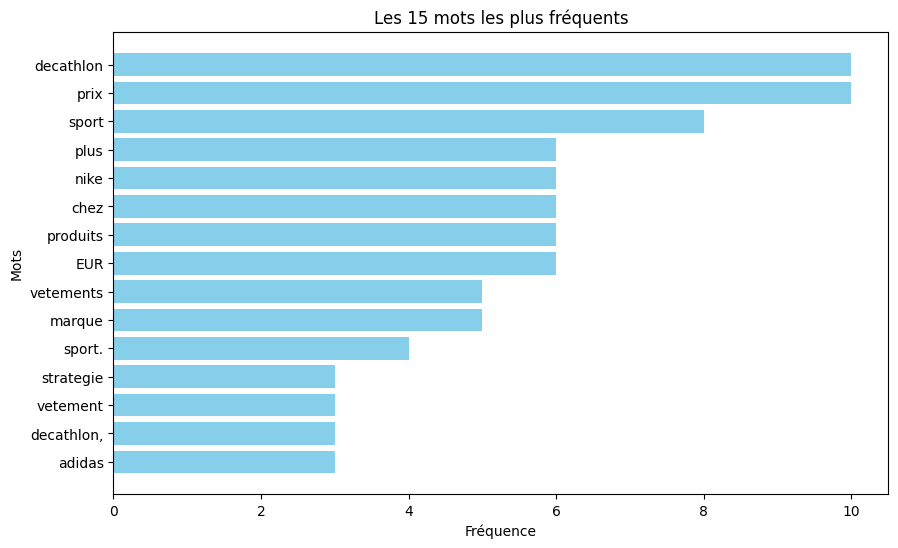

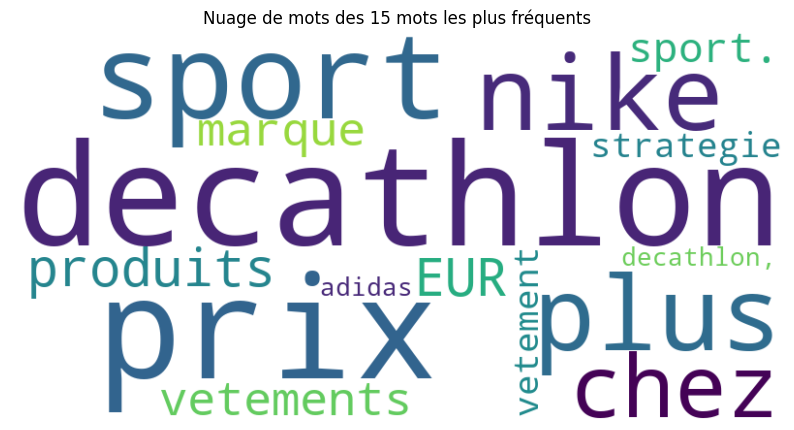

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Compter les occurrences des mots
frequence = Counter(texte_sans_accents)

# Obtenir les mots les plus fréquents
mots_frequents = frequence.most_common(15)

# Affichage des mots les plus fréquents
print(mots_frequents)

# Extraire les mots et leurs fréquences
mots = [mot[0] for mot in mots_frequents]
frequences = [mot[1] for mot in mots_frequents]

# Créer le graphique des barres
plt.figure(figsize=(10, 6))
plt.barh(mots, frequences, color='skyblue')
plt.xlabel('Fréquence')
plt.ylabel('Mots')
plt.title('Les 15 mots les plus fréquents')
plt.gca().invert_yaxis()  # Inverser l'axe des ordonnées pour afficher les mots les plus fréquents en haut
plt.show()

# Créer un dictionnaire pour le nuage de mots
dictionnaire_mots = dict(mots_frequents)

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dictionnaire_mots)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Masquer les axes
plt.title('Nuage de mots des 15 mots les plus fréquents')
plt.show()


Bag of words 

In [17]:
from collections import Counter

# Compter les occurrences des mots
frequence = Counter(texte_sans_accents)

# Obtenir les mots les plus fréquents
mots_frequents = frequence.most_common(20)

print(mots_frequents)

[('decathlon', 10), ('prix', 10), ('sport', 8), ('plus', 6), ('nike', 6), ('chez', 6), ('produits', 6), ('EUR', 6), ('vetements', 5), ('marque', 5), ('sport.', 4), ('strategie', 3), ('vetement', 3), ('decathlon,', 3), ('adidas', 3), ('matiere', 3), ('concurrents.', 3), ('meilleurs', 3), ('fait', 3), ('francaise', 3)]


## TF-IDF (pondération des mots en fonction de leur importance relative) :

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation de TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformation du texte
vecteurs_tfidf = tfidf.fit_transform(texte_sans_accents)

# Affichage du vocabulaire
print("Vocabulaire :", tfidf.get_feature_names_out())

# Conversion en matrice dense et affichage des valeurs TF-IDF
print("Matrice TF-IDF :\n", vecteurs_tfidf.toarray())

# Affichage du nombre de documents
print(f"Le texte est composé de {len(texte)} documents.")


Vocabulaire : ['16' '1976' '20' '299' '39' '399' '60' '89' '95' '99' 'abordable'
 'abordables' 'accessibles' 'activewear' 'adidas' 'affaire' 'affaires'
 'afin' 'agit' 'ailleurs' 'amis' 'appelee' 'approche' 'apres' 'articles'
 'artificielle' 'associant' 'associe' 'assortiment' 'assortiments'
 'atteindre' 'atteint' 'aucun' 'avenir' 'axe' 'base' 'basique' 'baskets'
 'bien' 'brosse' 'cadre' 'categorie' 'ce' 'celebres' 'celui' 'cette'
 'chaque' 'chaussure' 'chemin' 'chez' 'chiffre' 'cle' 'client'
 'collection' 'combines' 'comme' 'commence' 'comparaison' 'concentrer'
 'concurrents' 'constate' 'constitue' 'contraire' 'contrairement'
 'correspond' 'courant' 'creation' 'creee' 'croissance' 'decathlon'
 'decouvert' 'depuis' 'deux' 'difference' 'differents' 'donc' 'donnees'
 'doute' 'economique' 'effectuee' 'effet' 'egalement' 'egalite' 'element'
 'eleve' 'entre' 'entree' 'entreprise' 'equipes' 'esc' 'est' 'eur'
 'europe' 'excellente' 'expansion' 'faire' 'fait' 'familiale' 'femmes'
 'fideles' 'fo

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer ## transformer le texte en vecteurs numériques, en pondérant les mots selon leur fréquence relative dans le document


# Initialisation de TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformation du texte
vecteurs_tfidf = tfidf.fit_transform(texte)

# Affichage du vocabulaire
print("Vocabulaire :", tfidf.get_feature_names_out())

# Conversion en matrice dense et affichage des valeurs TF-IDF
print("Matrice TF-IDF :\n", vecteurs_tfidf.toarray())

# Affichage du nombre de documents
print(f"Le texte est composé de {len(texte)} documents")

Vocabulaire : ['16' '1976' '20' '299' '39' '399' '60' '89' '95' '99' 'abordable'
 'abordables' 'accessibles' 'activewear' 'adidas' 'affaire' 'affaires'
 'afin' 'agit' 'ailleurs' 'amis' 'appelée' 'approche' 'après' 'articles'
 'artificielle' 'associant' 'associe' 'assortiment' 'assortiments'
 'atteindre' 'atteint' 'aucun' 'aux' 'avenir' 'avons' 'axé' 'basique'
 'baskets' 'basé' 'bien' 'brossé' 'cadre' 'catégorie' 'ce' 'celui' 'ces'
 'cette' 'chaque' 'chaussure' 'chemin' 'chez' 'chiffre' 'client' 'clé'
 'collection' 'combinés' 'comme' 'commence' 'comparaison' 'concentrer'
 'concurrents' 'constate' 'constitue' 'contraire' 'contrairement'
 'correspond' 'courant' 'croissance' 'création' 'créée' 'célèbres' 'dans'
 'de' 'decathlon' 'depuis' 'des' 'deux' 'différence' 'différents' 'donc'
 'données' 'doute' 'du' 'découvert' 'effectuée' 'effet' 'en' 'entre'
 'entreprise' 'entrée' 'esc' 'est' 'et' 'europe' 'eux' 'excellente'
 'expansion' 'faire' 'fait' 'familiale' 'femmes' 'fidèles' 'football'
 'f

## Identifier des groupes de mots fréquents

### bigrams 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialisation de CountVectorizer pour extraire les bigrams
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))

# Transformation du texte
bigrams = vectorizer_bigram.fit_transform(texte)

# Récupération des bigrams extraits
bigrams_frequents = vectorizer_bigram.get_feature_names_out()

# Conversion de la matrice en tableau dense pour affichage
bigrams_matrix = bigrams.toarray()

# Affichage des bigrams extraits
print("Bigrams extraits :", bigrams_frequents)

# Affichage de la matrice des fréquences des bigrams
print("Matrice des fréquences des bigrams :\n", bigrams_matrix)


Bigrams extraits : ['16 99' '1976 sur' '20 celui' '299 95' '39 95' '39 99' '399 99' '60 de'
 '89 99' '95 chez' '95 et' '95 pour' '99 chez' '99 de' '99 le' '99 pour'
 '99 titre' 'abordable est' 'abordables que' 'abordables retviews'
 'accessibles tous' 'activewear combinés' 'activewear les' 'adidas chez'
 'adidas est' 'adidas et' 'adidas mais' 'adidas par' 'adidas restent'
 'adidas tend' 'affaire de' 'affaire hommes' 'affaires de' 'afin obtenir'
 'agit ailleurs' 'ailleurs aucun' 'ailleurs sans' 'amis passionnés'
 'appelée nike' 'approche globale' 'après les' 'articles les'
 'articles similaires' 'artificielle qui' 'associant qualité'
 'associe stylisme' 'assortiment de' 'assortiment vêtements'
 'assortiments de' 'atteindre 399' 'atteindre la' 'atteint que'
 'aucun produit' 'aucun signe' 'aux deux' 'aux grands' 'avenir cette'
 'avons découvert' 'avons effectuée' 'axé sur' 'basique en' 'baskets de'
 'basé sur' 'bien plus' 'brossé ou' 'cadre de' 'catégorie homme' 'ce le'
 'ce que' 'celui a

### trigrams 

In [29]:

# Initialisation de CountVectorizer pour extraire les trigrams
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))

# Transformation du texte
trigrams = vectorizer_trigram.fit_transform(texte)

# Récupération des trigrams extraits
trigrams_frequents = vectorizer_trigram.get_feature_names_out()

# Conversion de la matrice en tableau dense pour affichage
trigrams_matrix = trigrams.toarray()

# Affichage des trigrams extraits
print("Trigrams extraits :", trigrams_frequents)

# Affichage de la matrice des fréquences des trigrams
print("Matrice des fréquences des trigrams :\n", trigrams_matrix)

Trigrams extraits : ['16 99 de' '1976 sur un' '20 celui de' '299 95 pour' '39 95 chez'
 '39 99 chez' '399 99 pour' '60 de assortiment' '89 99 de'
 '95 chez adidas' '95 et celui' '95 pour adidas' '99 chez nike'
 '99 de decathlon' '99 de même' '99 le fait' '99 pour la' '99 titre de'
 'abordable est un' 'abordables que ses' 'abordables retviews utilise'
 'accessibles tous en' 'accessibles tous fait' 'activewear combinés est'
 'activewear les assortiments' 'adidas chez decathlon' 'adidas est de'
 'adidas et nike' 'adidas mais qui' 'adidas par comparaison'
 'adidas restent en' 'adidas tend atteindre' 'affaire de femmes'
 'affaire hommes qu' 'affaires de decathlon' 'afin obtenir les'
 'agit ailleurs sans' 'ailleurs aucun signe' 'ailleurs sans doute'
 'amis passionnés de' 'appelée nike esc' 'approche globale permet'
 'après les baskets' 'articles les plus' 'articles similaires dans'
 'artificielle qui lui' 'associant qualité et'
 'associe stylisme innovation' 'assortiment de zara'
 'assortime